### **Step 0: Load in Libraries and Dataset**

In [147]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [148]:
# Load in dataset
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [149]:
# Check summary of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

### **Step 1: Cleaning**

In [150]:
# Standardize categorical columns to be consistent
df['person_education'] = df['person_education'].str.lower().str.strip()
df['person_home_ownership'] = df['person_home_ownership'].str.lower().str.strip()
df['loan_intent'] = df['loan_intent'].str.lower().str.strip()
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].str.lower().str.strip()

<Axes: xlabel='loan_amnt'>

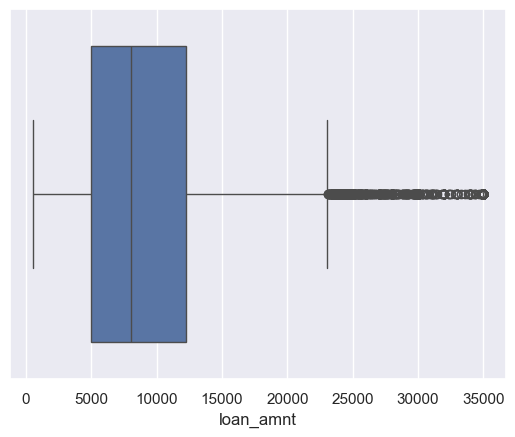

In [151]:
# Create a boxplot to detect outliers for loan_amount
sns.boxplot(x=df['loan_amnt'])

In [152]:
# Calculate IQR for loan_amount
Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

In [153]:
# Remove outliers that fall outside 1.5 * IQR range
df = df[(df['loan_amnt'] >= (Q1 - 1.5 * IQR)) & (df['loan_amnt'] <= (Q3 + 1.5 * IQR))]
len(df)

42652

<Axes: xlabel='person_income'>

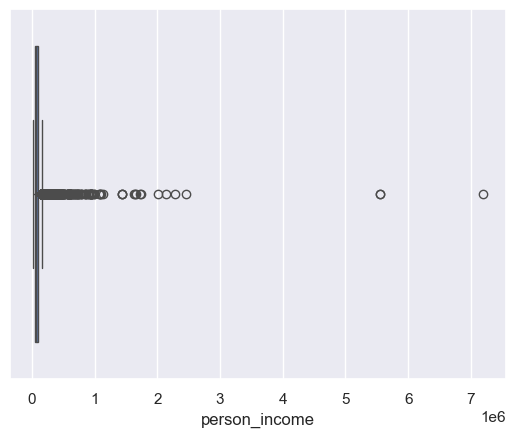

In [154]:
# Create a boxplot to detect outliers for income
sns.boxplot(x=df['person_income'])

In [155]:
# Calculate IQR for loan_amount
Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1

In [156]:
# Remove outliers that fall outside 1.5 * IQR range
df = df[(df['person_income'] >= (Q1 - 1.5 * IQR)) & (df['person_income'] <= (Q3 + 1.5 * IQR))]
len(df)

40694

### **Step 2: EDA**

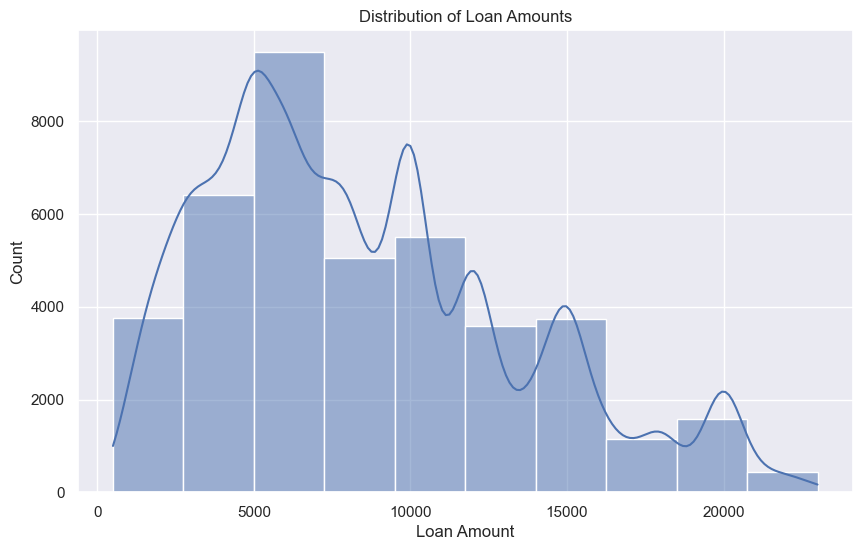

In [157]:
# Histogram for loan amount
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'], bins=10, kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amounts')
plt.show()

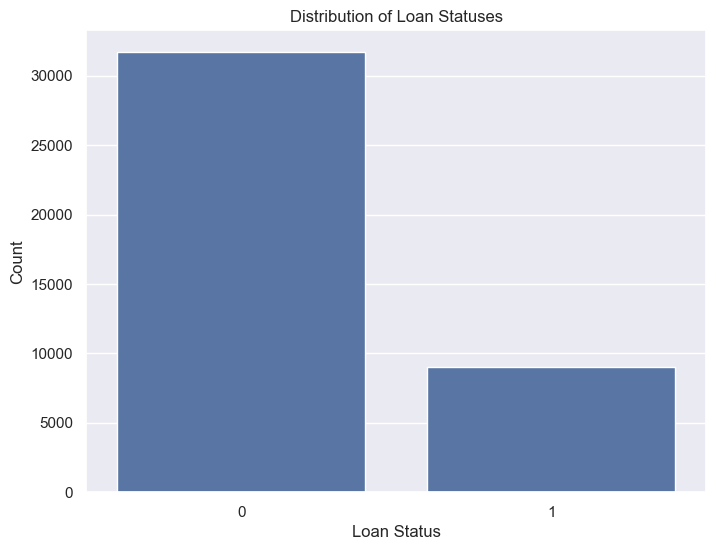

In [158]:
# Bar plot for loan approval status
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Statuses')
plt.show()

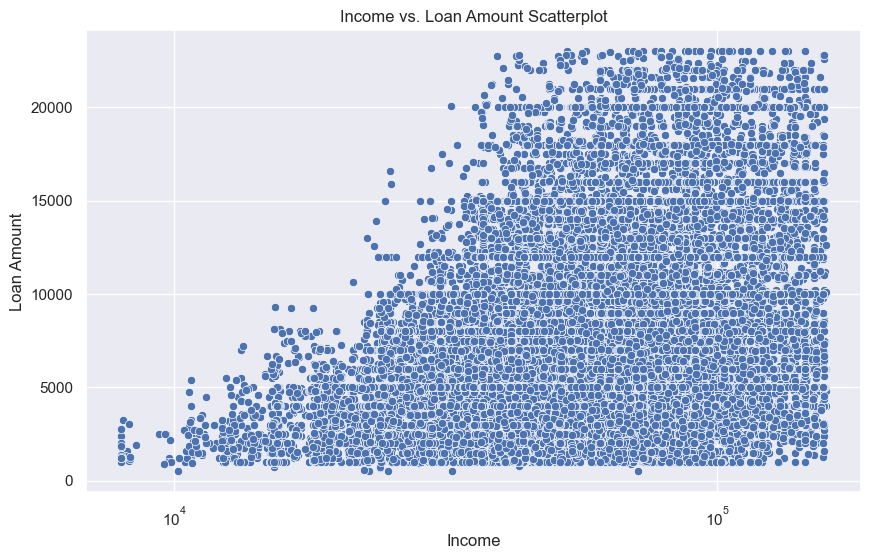

In [172]:
# Scatter plot between loan amount and income
plt.figure(figsize=(10,6))
sns.scatterplot(x='person_income', y='loan_amnt', data=df)
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.title('Income vs. Loan Amount Scatterplot')
plt.show()

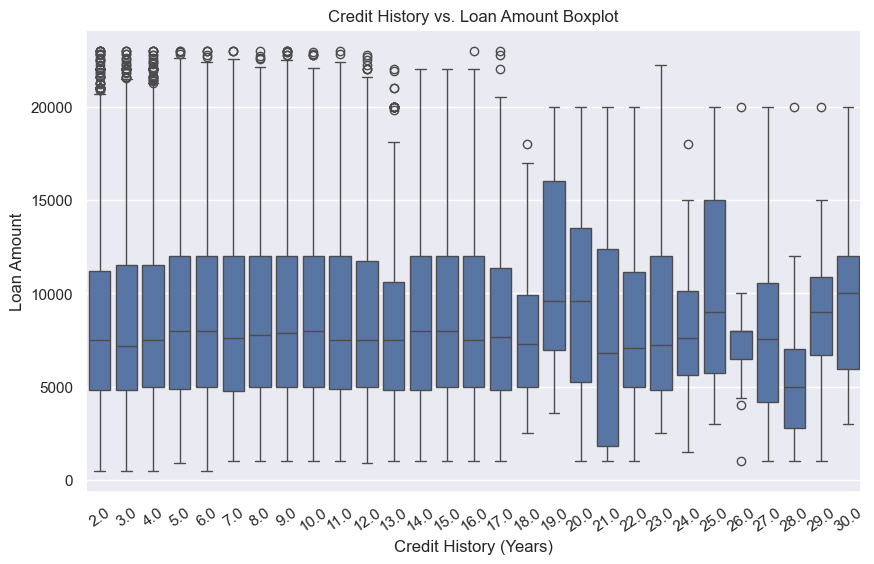

In [160]:
# Box plot for credit history vs loan approval
plt.figure(figsize=(10, 6))
sns.boxplot(x='cb_person_cred_hist_length', y='loan_amnt', data=df)
plt.xlabel('Credit History (Years)')
plt.xticks(rotation=35)
plt.ylabel('Loan Amount')
plt.title('Credit History vs. Loan Amount Boxplot')
plt.show()

In [161]:
# Variation in greater credit history
# Due to less people with credit history needing loans
df['cb_person_cred_hist_length'].describe()

count    40694.000000
mean         5.768148
std          3.821257
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64

In [162]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,female,high school,12282.0,0,own,1000.0,education,11.14,0.08,2.0,504,yes,0
2,25.0,female,high school,12438.0,3,mortgage,5500.0,medical,12.87,0.44,3.0,635,no,1
5,21.0,female,high school,12951.0,0,own,2500.0,venture,7.14,0.19,2.0,532,no,1
9,21.0,female,high school,12739.0,0,own,1600.0,venture,14.74,0.13,3.0,640,no,1
11,21.0,female,associate,13113.0,0,own,4500.0,homeimprovement,8.63,0.34,2.0,651,no,1


In [163]:
# Change any categorical or boolean variables to numeric to create a correlation matrix
from sklearn.preprocessing import LabelEncoder
numeric = df.copy()

numeric['person_gender'] = 1 * (numeric['person_gender'] == 'male')
numeric['previous_loan_defaults_on_file'] = 1* (numeric['previous_loan_defaults_on_file'] == 'yes')

le = LabelEncoder()
numeric['person_education'] = le.fit_transform(df['person_education'])
numeric['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
numeric['loan_intent'] = le.fit_transform(df['loan_intent'])
numeric.dtypes

person_age                        float64
person_gender                       int64
person_education                    int64
person_income                     float64
person_emp_exp                      int64
person_home_ownership               int64
loan_amnt                         float64
loan_intent                         int64
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file      int64
loan_status                         int64
dtype: object

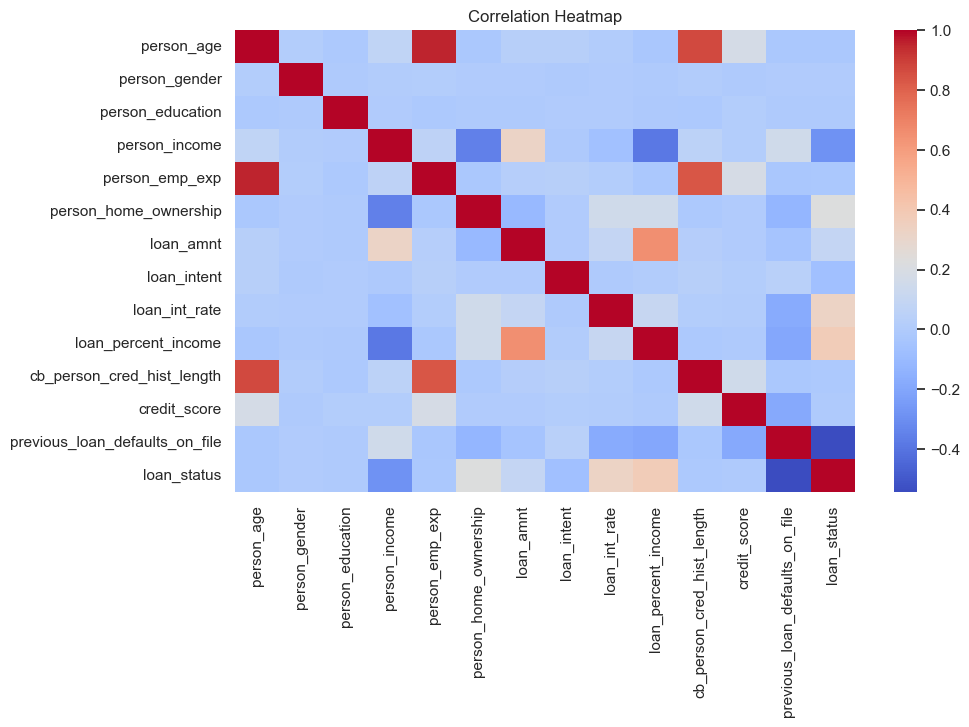

In [164]:
# Create our correlation matrix and heatmap
correlation = numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [165]:
# Only gather correlation values with loan_status not including loan_status 
status_corr = correlation['loan_status'].drop('loan_status')
status_corr = status_corr.abs().sort_values(ascending=False)
status_corr = status_corr.reset_index()
status_corr.columns = ['Variable', 'Correlation with loan_status']
status_corr

,Variable,Correlation with loan_status
0,previous_loan_defaults_on_file,0.543956
1,loan_percent_income,0.374922
2,loan_int_rate,0.325187
3,person_income,0.284846
4,person_home_ownership,0.226658
5,loan_amnt,0.093717
6,loan_intent,0.067852
7,person_age,0.021248
8,person_emp_exp,0.020203
9,cb_person_cred_hist_length,0.014651


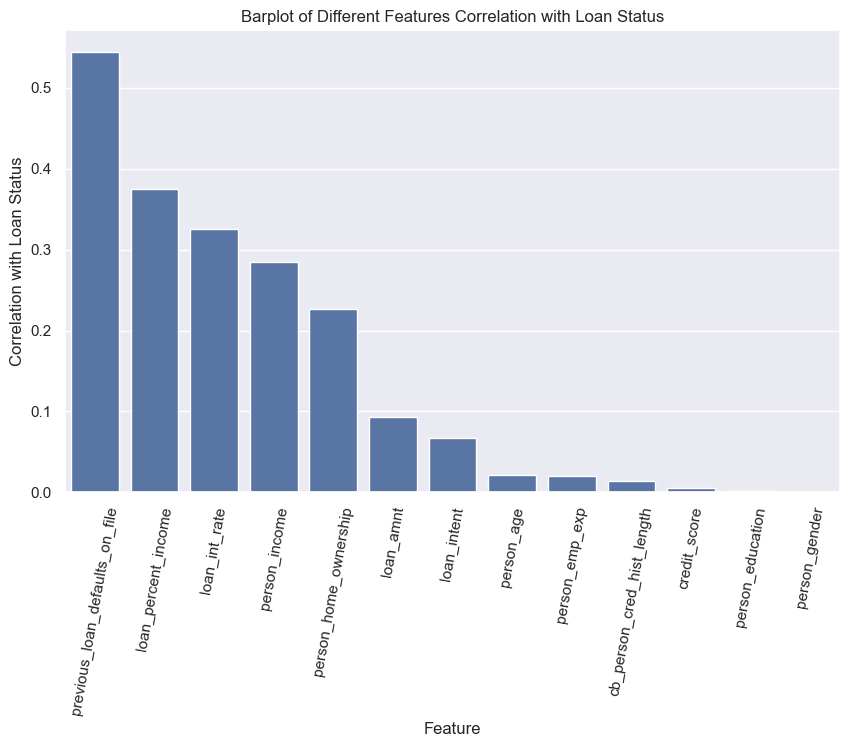

In [166]:
# Create countplot to better visualize relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='Correlation with loan_status', data=status_corr)
plt.xlabel('Feature')
plt.xticks(rotation=80)
plt.ylabel('Correlation with Loan Status')
plt.title('Barplot of Different Features Correlation with Loan Status')
plt.show()

### **Step 3: KMeans**

In [187]:
# Scale the top 5 features from our correlation matrix to perform kmeans on
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['loan_percent_income', 'loan_int_rate', 'person_income']])

In [188]:
# Apply KMeans
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, n_init = "auto", random_state=22)
df['cluster'] = kmeans.fit_predict(scaled_data)

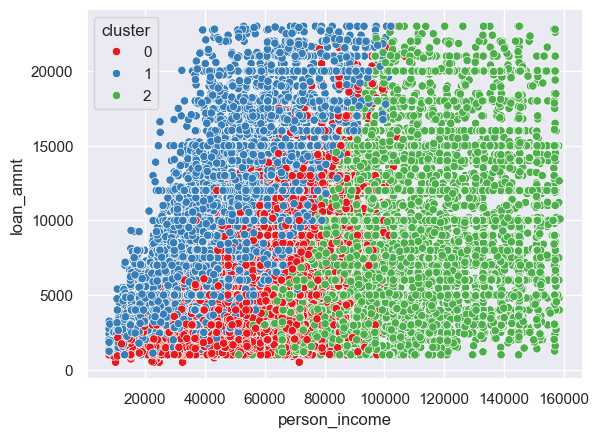

In [189]:
# Visualize the clusters
sns.scatterplot(x='person_income', y='loan_amnt', hue='cluster', data=df, palette='Set1')
plt.show()

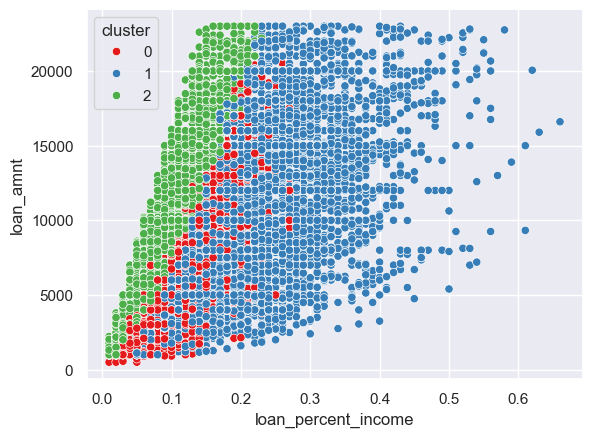

In [190]:
# Visualize the clusters
sns.scatterplot(x='loan_percent_income', y='loan_amnt', hue='cluster', data=df, palette='Set1')
plt.show()

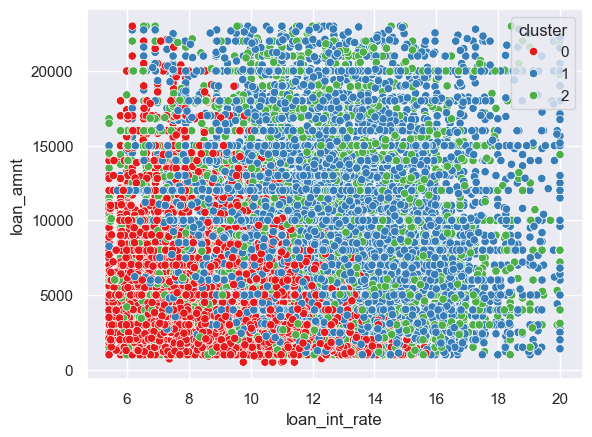

In [191]:
# Visualize the clusters
sns.scatterplot(x='loan_int_rate', y='loan_amnt', hue='cluster', data=df, palette='Set1')
plt.show()

### **Step 4: Modeling**

In [200]:
# Split our data into training and test sets while stratifying for loan_status
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df.drop('cluster', axis=1), train_size=0.2, stratify=df['loan_status'], random_state=22)

In [201]:
df_train.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [198]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status',
       'cluster'],
      dtype='object')

In [208]:
import statsmodels.formula.api as smf

log_model = smf.logit('loan_status ~ person_age + person_gender + person_education + person_income + person_emp_exp + person_home_ownership + loan_amnt + loan_intent + loan_int_rate + loan_percent_income + cb_person_cred_hist_length + credit_score + previous_loan_defaults_on_file', data=df_train).fit()
print(log_model.summary())

         Current function value: 0.218177
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 8138
Model:                          Logit   Df Residuals:                     8115
Method:                           MLE   Df Model:                           22
Date:                Fri, 06 Dec 2024   Pseudo R-squ.:                  0.5871
Time:                        16:11:36   Log-Likelihood:                -1775.5
converged:                      False   LL-Null:                       -4300.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.1273      0.884      0.144      0.886      -1.

/Users/isaac/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
